In [9]:
from src.utils import *
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
import cv2
import os

# Directory containing the images
image_dir = "Dataset_CvDl_Hw1/Q1_Image"

# Initialize an empty list to store the images
images = []

# Iterate over the files in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".bmp"):
        # Construct the full file path
        file_path = os.path.join(image_dir, filename)
        
        # Read the image and append it to the list
        image = cv2.imread(file_path)
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to read image: {file_path}")

# Now, the 'images' list contains all the images from the directory


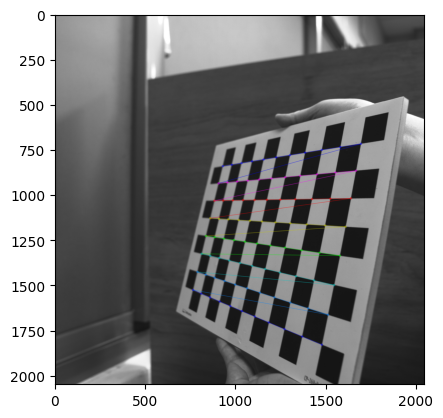

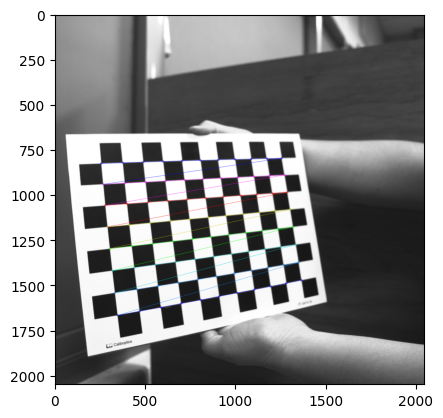

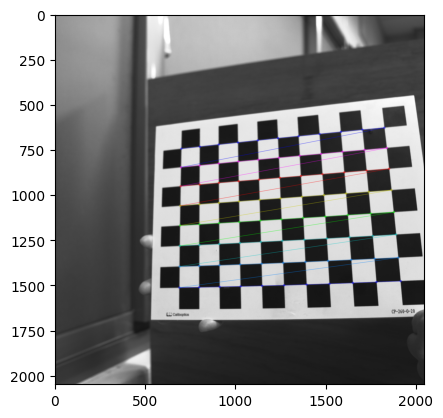

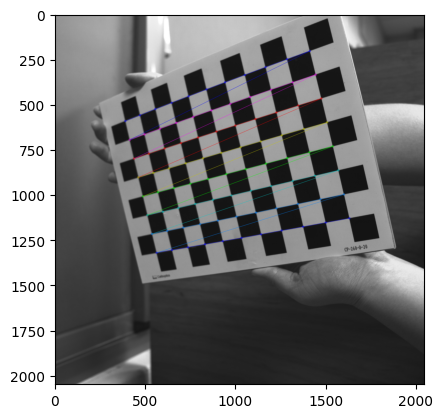

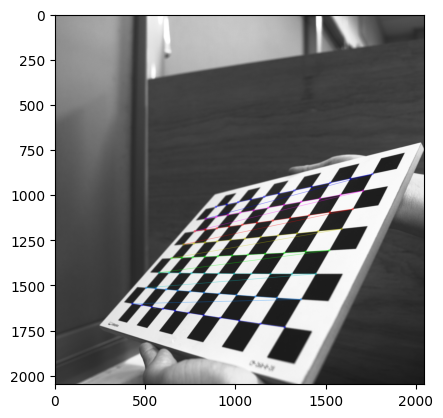

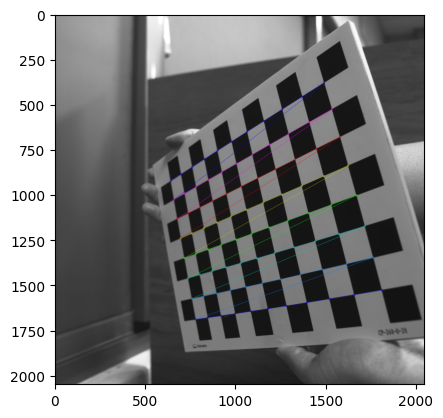

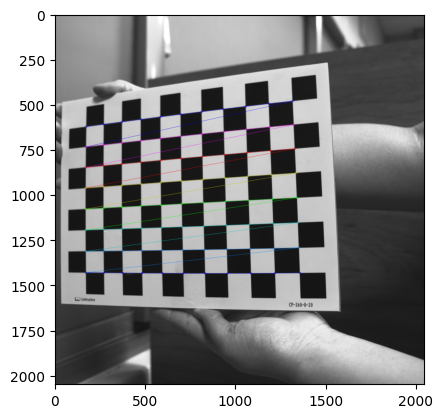

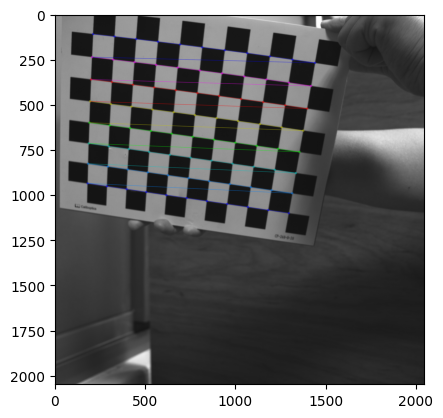

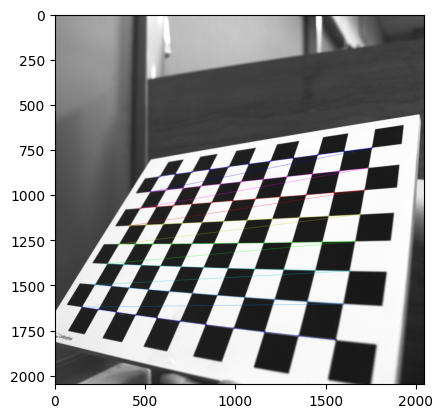

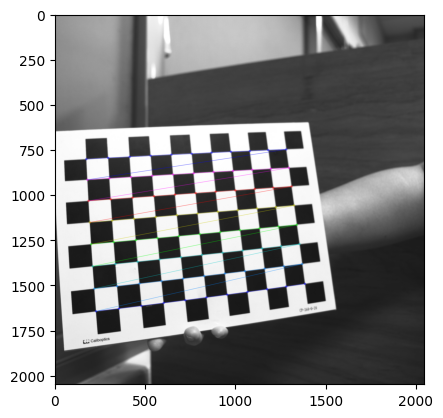

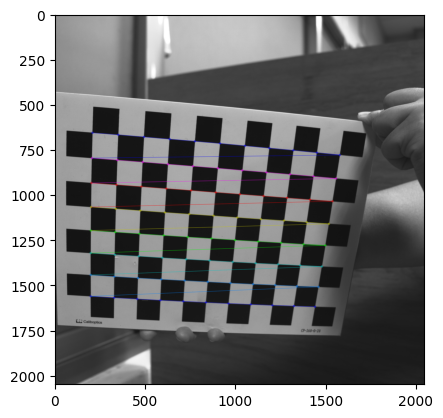

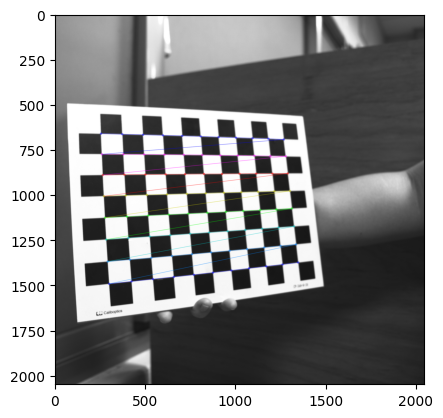

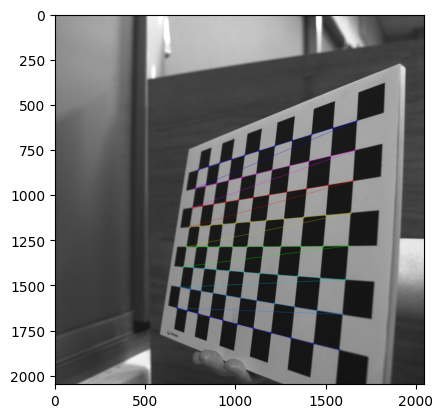

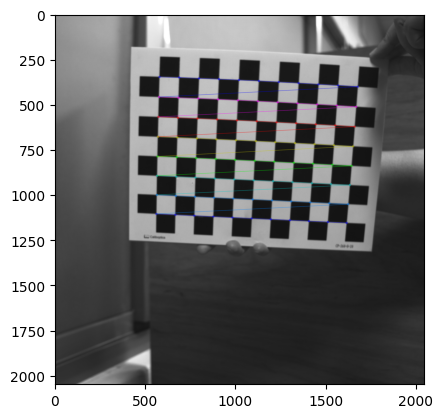

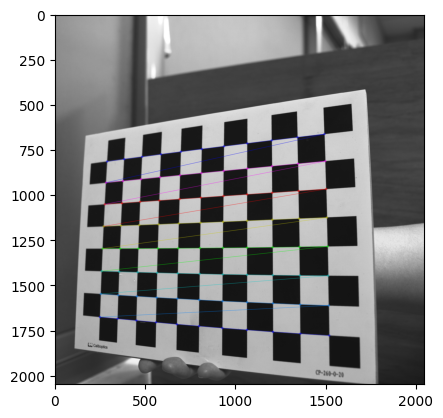

In [11]:
objpoints = [] #3d point in real world space
imgpoints = [] #2d points in image plane
width = 11
height = 8
objp = np.zeros((height*width, 3), np.float32)
objp[:,:2] = np.mgrid[0:width, 0:height].T.reshape(-1, 2)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001) 
for image in images:
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    ret, corners = cv.findChessboardCorners(gray, (width,height), None)
    if ret:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1, -1), criteria)
        imgpoints.append(corners)

        # Draw and Display the corners
        find_corner_image = cv.drawChessboardCorners(image.copy(), (width,height), corners2, ret)
        cv2.cvtColor(find_corner_image, cv2.COLOR_BGR2RGB)
        plt.imshow(find_corner_image)
        plt.show()

In [12]:
h, w = images[0].shape[:2]
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, (w,h), None, None)
print("Intrinsic matrix: \n", mtx)

Intrinsic matrix: 
 [[2.22339353e+03 0.00000000e+00 1.02888550e+03]
 [0.00000000e+00 2.22295242e+03 1.04050529e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [13]:
rotate_v = rvecs
translate_v = tvecs
number_image = 10
if not ((number_image -1) < 0 and (number_image -1)> len(images)):
    rvec = rotate_v[number_image - 1]
    tvec = translate_v[number_image-1]
    tvec = tvec.reshape(3,1)
    if rvec is not None and tvec is not None:
        Rotation_matrix = cv.Rodrigues(rvec)[0]
        Extrinsic_matrix = np.hstack([Rotation_matrix, tvec])
        print("Extrinsix: \n", Extrinsic_matrix)
else:
    print("Input error: Please input from 1-15")

Extrinsix: 
 [[-0.96398207 -0.11792882 -0.2383933   3.20564425]
 [ 0.07543993 -0.98075012  0.18010558  4.09598632]
 [-0.2550439   0.15563418  0.95432207 19.95579798]]


In [14]:
print("Distortion: \n", dist[-1])

Distortion: 
 [-0.12851724  0.10091854 -0.00062626  0.00043284 -0.02310163]


(2012, 2013, 3)


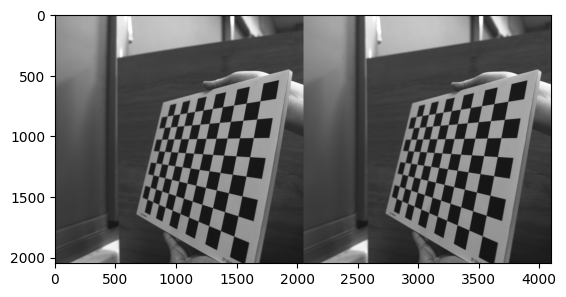

(2012, 2013, 3)


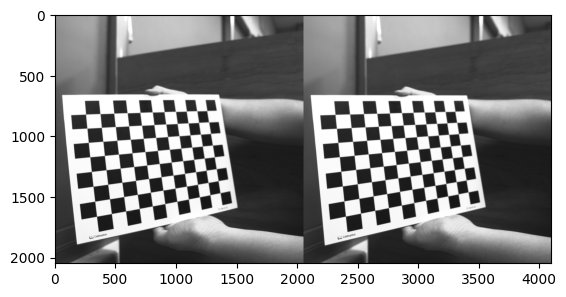

(2012, 2013, 3)


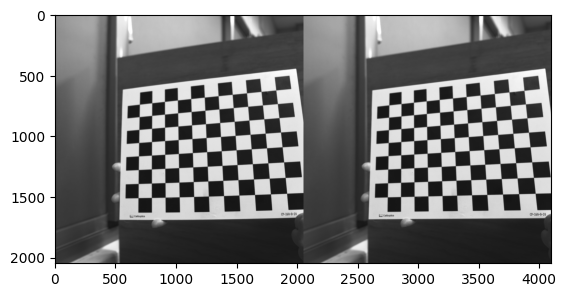

(2012, 2013, 3)


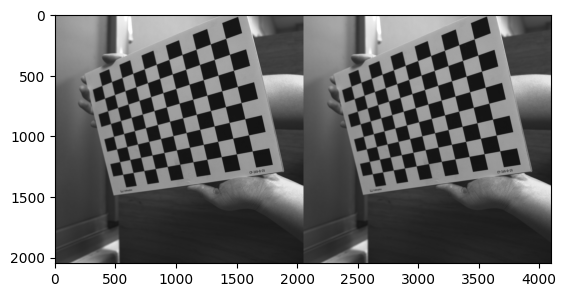

(2012, 2013, 3)


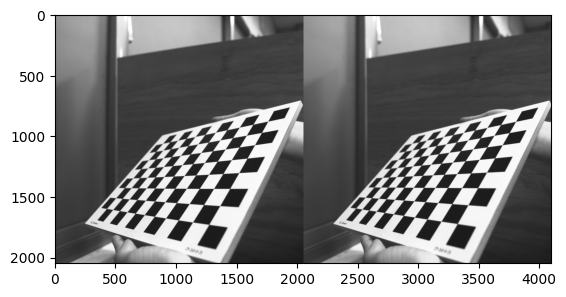

(2012, 2013, 3)


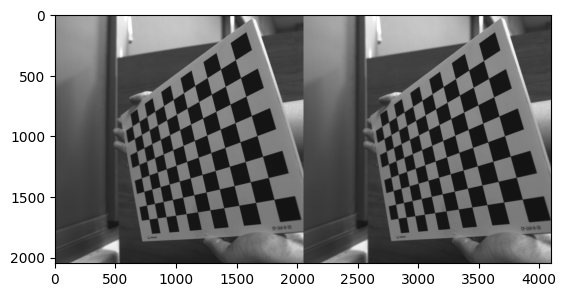

(2012, 2013, 3)


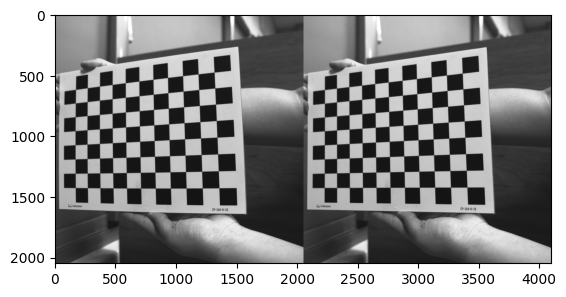

(2012, 2013, 3)


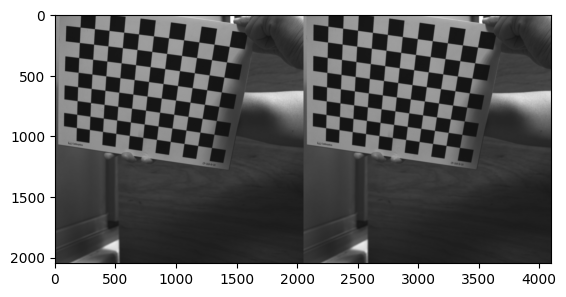

(2012, 2013, 3)


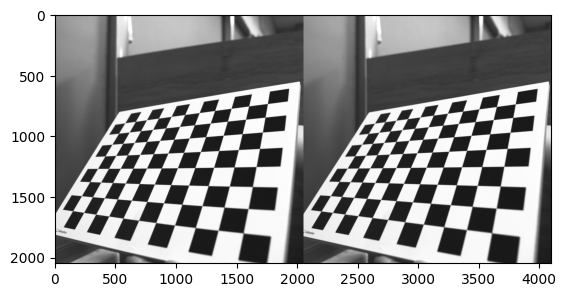

(2012, 2013, 3)


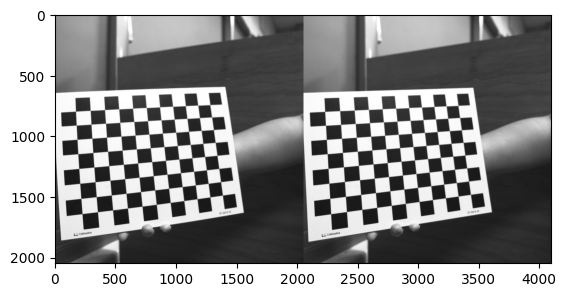

(2012, 2013, 3)


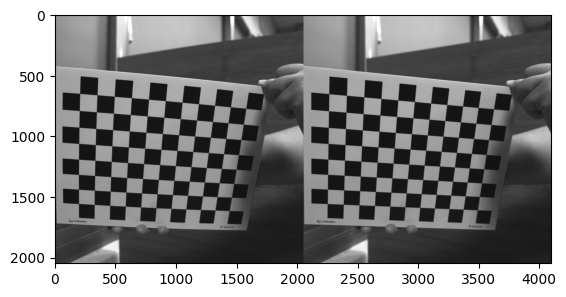

(2012, 2013, 3)


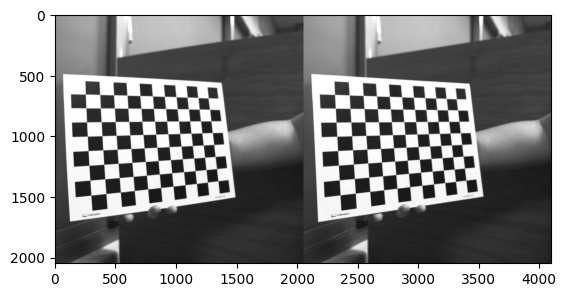

(2012, 2013, 3)


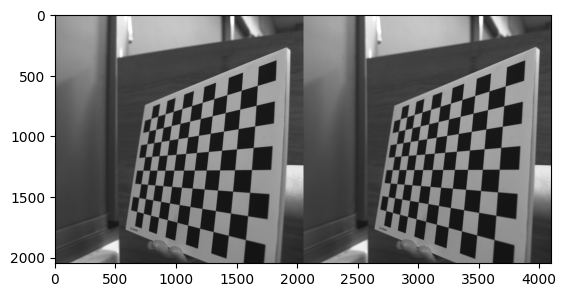

(2012, 2013, 3)


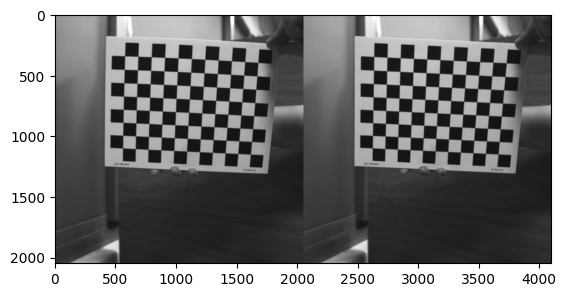

(2012, 2013, 3)


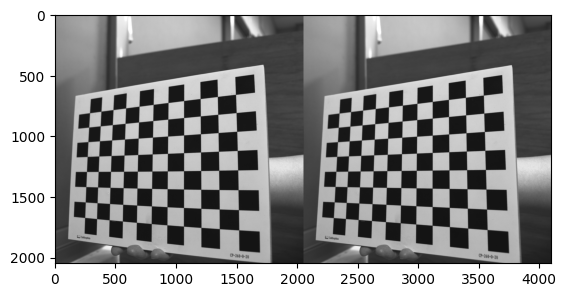

In [15]:

for image in images:
    h, w = image.shape[:2]
    newcameramatrix, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w,h))
    dst = cv2.undistort(image, mtx, dist, None, newcameramatrix)
    x, y, w, h = roi
    dst = dst[y:y+h, x:x+w]
    print(dst.shape)
    dst = cv2.resize(dst, (image.shape[1], image.shape[0]))
    new = concat_image(image, dst) 
    cv2.cvtColor(new, cv2.COLOR_BGR2RGB)
    plt.imshow(new)
    plt.show()

